In [1]:
import sys

import numpy as np

from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy.housekeeping import Housekeeping
from stixdcpy import ancillarydata as anc
from stixdcpy.sciencedata import SciL1, SciSpectrogram

from matplotlib import pyplot as plt

from pprint import pprint
%matplotlib notebook

In [2]:
request_id=	2108010255
sci_data=SciL1.fetch(request_id=request_id)
#Bulk science data request ids (or also called unique ids) can be found on the science data web page at STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2108010255_20210801T150229-20210801T150529_012533_V01.fits ...


OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

In [8]:
data=sci_data.data
#data is a fits file object
data.info()
data[0].header['DATE_BEG']


Filename: /tmp/solo_L1A_stix-sci-xray-l1-2108010255_20210801T150229-20210801T150529_012533_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   180R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


'2021-08-01T15:02:29.681'

<IPython.core.display.Javascript object>


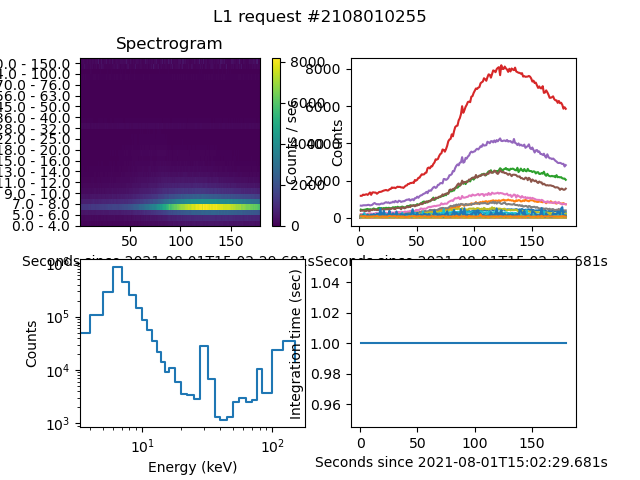

(<Figure size 640x480 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f408a93d7c0>,
       dtype=object))

In [9]:
sci_data.peek()
#science data quicklook

In [10]:
data.info()


Filename: /tmp/solo_L1A_stix-sci-xray-l1-2108010255_20210801T150229-20210801T150529_012533_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   180R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


In [11]:
#fig=plt.figure()
l1data=data[2].data
#print(l1data['num_energy_groups'])
print(l1data['counts'].shape)
print(l1data['timedel'].shape)
print(l1data['triggers'])
trigger_rates=l1data['triggers'][1:,:]/l1data['timedel'][:-1,None]

tau=9.6e-6
eta=1e-5
live_time=1 - tau*trigger_rates
photo_in_rates=trigger_rates /(1-tau*trigger_rates)

counts=l1data['counts'][1:,:,:,:]/l1data['timedel'][:-1,None, None, None]

print('counts shape:', counts.shape)
#print(counts.shape)
print('triggers shape:', trigger_rates.shape)
out=np.zeros_like(counts)







(180, 32, 12, 32)
(180,)
[[ 271  335  215 ...  271  271  303]
 [ 303  303  199 ...  271  303  303]
 [ 303  303  271 ...  247  247  335]
 ...
 [1215 1215  799 ...  991  991 1215]
 [1215 1215  799 ...  927 1087 1215]
 [1215 1215  735 ...  863  991 1215]]
counts shape: (179, 32, 12, 32)
triggers shape: (179, 16)


(179, 32, 12, 32)


<IPython.core.display.Javascript object>


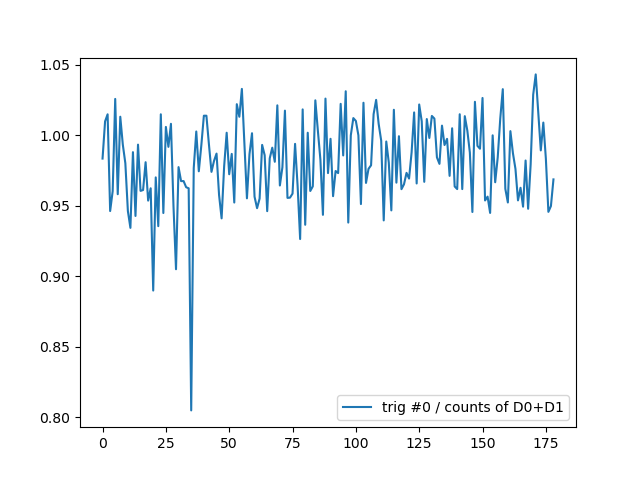

<IPython.core.display.Javascript object>


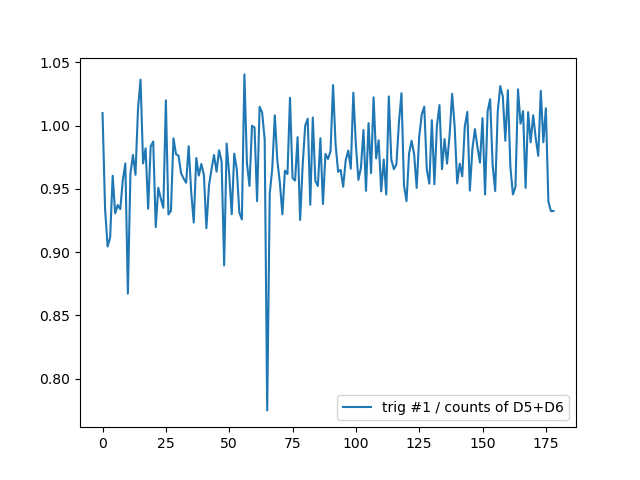

array([[  86.,  177.,  449., ...,   44.,  129.,   84.],
       [ 102.,  164.,  430., ...,  101.,  101.,   88.],
       [  71.,  158.,  429., ...,  127.,  167.,   93.],
       ...,
       [ 337.,  797., 2110., ...,  102.,   87.,   90.],
       [ 326.,  751., 2114., ...,  135.,  124.,   79.],
       [ 310.,  730., 2047., ...,   65.,  128.,   70.]])

In [12]:
print(counts.shape)


DET_GROUPS = [
	[1, 2],
	[6, 7],
	[5, 11],
	[12, 13],
	[14, 15],
	[10, 16],
	[8, 9],
	[3, 4],
	[31, 32],
	[26, 27],
	[22, 28],
	[20, 21],
	[18, 19],
	[17, 23],
	[24, 25],
	[29, 30]
]
for i, dets in enumerate(DET_GROUPS):
    if i>=2:
        break
    #    continue
    d1,d2=dets[0]-1,dets[1]-1
    #trig=
    fig=plt.figure()
    #print(i, d1,d2)
    trig=trigger_rates[:,i]
    count_sum=np.sum(counts[:,d1,:,:]+ counts[:,d2,:,:], axis=(1,2))
    #plt.plot(trig, label=f'trig {i}')
    ratio=count_sum/trig
    #plt.plot(count_sum,label=f'counts of D{d1}+D{d2}')
    plt.plot(count_sum/trig,label=f'trig #{i} / counts of D{d1}+D{d2}')
    #most of the counts are not recorded at the begining due to the energy range 
    plt.legend()
    #break
    
    
    

    #print(i, '#', trig)
    #print(count_sum)
    #print(l1data['timedel'])


sci_data.spectrogram[1:, :]

In [13]:
x=np.arange(32).reshape((4,8))
x,x[:,None]

(array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31]]),
 array([[[ 0,  1,  2,  3,  4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11, 12, 13, 14, 15]],
 
        [[16, 17, 18, 19, 20, 21, 22, 23]],
 
        [[24, 25, 26, 27, 28, 29, 30, 31]]]))

In [14]:
request_id=	2108150003
l4d=SciSpectrogram.fetch(request_id=request_id)

Loading /tmp/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_012729_V01.fits from local archive ...


In [ ]:
l4d.data.info()
l4d.peek()

Loading /tmp/solo_L1A_stix-sci-xray-l1-2107040009_20210704T000002-20210704T013502_012326_V01.fits from local archive ...


<IPython.core.display.Javascript object>


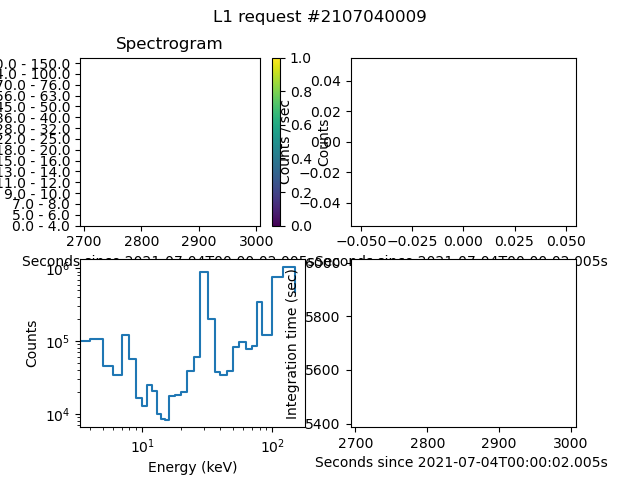

(<Figure size 640x480 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4088cc6be0>,
       dtype=object))

In [15]:
request_id=2107040009
l1bkg=SciL1.fetch(request_id=request_id)
l1bkg.peek()
